# Proyecto Integrador 1 - Análisis estadístico de datos

## Descripción
Este proyecto está basado en el supuesto de trabajar para una tienda online llamada "Ice" que vende videojuegos por todo el mundo. Trabajaremos con un dataset con el objetivo de identificar patrones que determinen si un juego tiene éxito o no.

### Estrategia
El proyecto lo dividiremos en las siguientes etapas:
1. Exploración del dataset
2. Preprocesamiento de los datos
3. Análisis de los datos
4. Segmentación de datos
5. Pruebas de hipótesis
6. Conclusión general



## 1. Exploración del dataset
En esta sección cargaremos el dataset al proyecto y estudiaremos la estructura general de los datos para familiarizarnos con los mismos.

In [11]:
# Cargamos las librerías
import pandas as pd
from matplotlib import pyplot as plt


In [12]:
# Utilizamos un bloque try-except para incluir las dos rutas al archivo (ruta relativa en PC local y ruta relativa en el servidor de TripleTen)
try:
  games = pd.read_csv('./datasets/games.csv')
  platform_info = pd.read_csv('./datasets/consolas.csv', sep='|')
except:
  games = pd.read_csv('/datasets/games.csv')
  platform_info = pd.read_csv('/datasets/consolas.csv', sep='|')

In [13]:
# Mostramos la estructura del dataset con el método info(), describe() y visualizamos las primeras líneas con head().
games.info()
print()
print(games.describe()) # Mostramos los datos de las columnas numéricas
print()
print(games.describe(include='object')) # Exploramos el método describe en los campos con tipo de dato object

# Mostramos las primeras líneas del dataframe
games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [14]:
# Mostramos el dataset 'platform_info'
platform_info.info()
platform_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   platform           31 non-null     object
 1    commercial_name   31 non-null     object
 2    vendor            31 non-null     object
 3    year_of_release   31 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


,platform,commercial_name,vendor,year_of_release
0,PS2,PlayStation 2,Sony,2000
1,DS,Nintendo DS,Nintendo,2004
2,PS3,PlayStation 3,Sony,2006
3,Wii,Wii,Nintendo,2006
4,X360,Xbox 360,Microsoft,2005


### Observaciones
1. Dataframe 'games':
- En un primer vistazo observamos que tenemos 16715 filas y 11 columnas.
- Tenemos varias columnas con datos ausentes, en algunas columnas son muchos los datos ausentes.
- Tenemos también tipos de datos que no corresponden a lo que el nombre de la columna indica.
2. Dataframe 'platform_info':
- Observamos que tenemos espacios en blanco para eliminar tanto en los nombres de columnas, como la info del dataset.

## 2. Preprocesamiento de los datos
En esta sección nos enfocaremos en buscar y corregir errores de presentación, valores duplicados y valores ausentes.

### 2.1 Errores de presentación
En la sección anterior identificamos rápidamente que los nombres de las columnas no siguen el formato preferido "snake_case". Vamos a corregirlos.
También identificamos algunos tipos de datos que podemos cambiar, otros necesitarán un tratamiento previo para poder cambiarlos, ese tratamiento lo haremos en las siguientes secciones al revisar valores ausentes y duplicados.

In [15]:
# Cambiar nombres de columnas al formato "snake_case"
new_col_names = []
for name in games.columns:
    name_lowered = name.lower()
    new_col_names.append(name_lowered)

games.columns = new_col_names
games.columns


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [16]:
# Cambiamos el tipo de datos de 'year_of_release' a tipo de fecha
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y')
games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


In [17]:
# Cambiamos el tipo de datos de las columnas 'platform' y 'genre' a category, ya que solo tenemos 31 plataformas y 12 géneros. Con este cambio podemos ahorrar espacio.
games['platform'] = games['platform'].astype('category')
games['genre'] = games['genre'].astype('category')
games.dtypes

name                       object
platform                 category
year_of_release    datetime64[ns]
genre                    category
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
critic_score              float64
user_score                 object
rating                     object
dtype: object

In [18]:
# Eliminamos los espacios en blanco del dataset 'platform_info'
# Primero eliminamos los epacios en las columnas
new_col_names = []
for name in platform_info.columns:
    name_striped = name.strip()
    new_col_names.append(name_striped)
platform_info.columns = new_col_names

# Después eliminamos los espacios en el contenido del dataset

for column in platform_info:
    if platform_info[column].dtype == object:
        platform_info[column] = platform_info[column].str.strip()

# Cambiamos el tipo de datos de 'year_of_release'
platform_info['year_of_release'] = pd.to_datetime(platform_info['year_of_release'], format='%Y')

platform_info.info()
platform_info.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   platform         31 non-null     object        
 1   commercial_name  31 non-null     object        
 2   vendor           31 non-null     object        
 3   year_of_release  30 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 1.1+ KB


,platform,commercial_name,vendor,year_of_release
0,PS2,PlayStation 2,Sony,2000-01-01
1,DS,Nintendo DS,Nintendo,2004-01-01
2,PS3,PlayStation 3,Sony,2006-01-01
3,Wii,Wii,Nintendo,2006-01-01
4,X360,Xbox 360,Microsoft,2005-01-01


### 2.2 Valores duplicados
En esta sección analizaremos si tenemos filas completas duplicadas y duplicados implícitos en las columnas 'platform' y 'genre'

In [19]:
# Buscamos filas completas duplicadas
print('Filas completas duplicadas:', games.duplicated().sum())

Filas completas duplicadas: 0


In [20]:
# Buscamos duplicados implícitos en las columnas 'platform' y 'genre'
print(games['platform'].value_counts())
print()
print(games['genre'].value_counts())

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: count, dtype: int64

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64


### 2.3 Valores ausentes
En esta sección analizaremos los valores ausentes y determinaremos cómo manejarlos

In [21]:
print('Resumen de valores ausentes por columna') # Imprimimos un encabezado explicativo para nuestra tabla
print() # Imprimimos un salto de línea
print(games.isna().sum()) # Calcular el número de valores ausentes

Resumen de valores ausentes por columna

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [22]:
# Analizamos los valores ausentes en la columna 'name'
print(games[games['name'].isna()])
# Eliminamos estas filas ya que no podemos hacer un buen análisis sin esta información. 
# Además la plataforma es muy antigua por lo que considero que no es información tan relevante para nuestro análisis.
games = games.dropna(subset=['name'])

      name platform year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN      1993-01-01   NaN      1.78      0.53      0.00   
14244  NaN      GEN      1993-01-01   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [23]:
# Analizamos los valores ausentes en la columna 'year_of_release'
missing_year_of_release = games[games['year_of_release'].isna()]   # Filtramos las filas con valores ausentes
missing_year_of_release.describe()                          # Utilizamos el método describe para ver los valores máximos, mínimos y media de ventas


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaT,0.219888,0.090929,0.024907,0.032007,67.584416
min,NaT,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaT,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaT,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaT,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaT,4.260000,2.360000,0.770000,0.710000,94.000000
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740


C:\Users\Laptop\AppData\Local\Temp\ipykernel_19960\1233622761.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  games['year_of_release'].isna().groupby(games['platform']).mean().sort_values().plot(kind='bar')


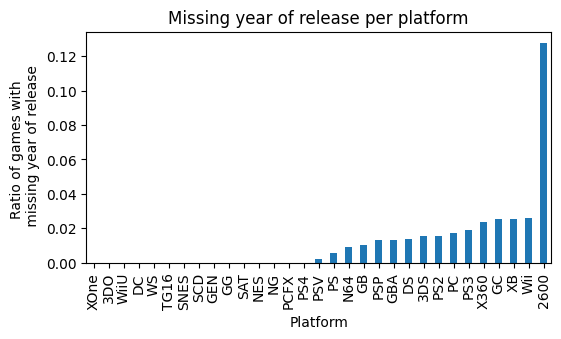

In [24]:
# Analizamos los valores ausentes respecto a las plataformas
plt.figure(figsize=(6,3))
games['year_of_release'].isna().groupby(games['platform']).mean().sort_values().plot(kind='bar')
plt.title('Missing year of release per platform')
plt.xlabel('Platform')
plt.ylabel('Ratio of games with \n missing year of release')
plt.show()


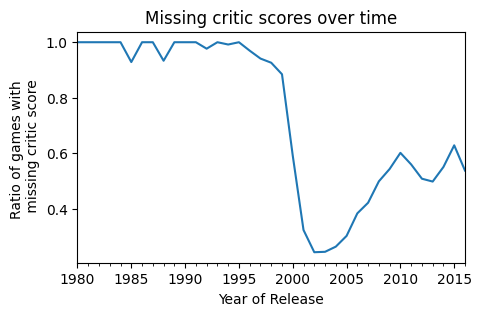

In [25]:
# Analizamos los valores ausentes en la columna 'critic_score'
# Analizamos valores ausentes respecto al tiempo
plt.figure(figsize=(5,3))
games['critic_score'].isna().groupby(games['year_of_release']).mean().plot(kind='line')
plt.title('Missing critic scores over time')
plt.xlabel('Year of Release')
plt.ylabel('Ratio of games with \n missing critic score')
plt.show()


C:\Users\Laptop\AppData\Local\Temp\ipykernel_19960\2476239701.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  games['critic_score'].isna().groupby(games['platform']).mean().sort_values().plot(kind='bar')


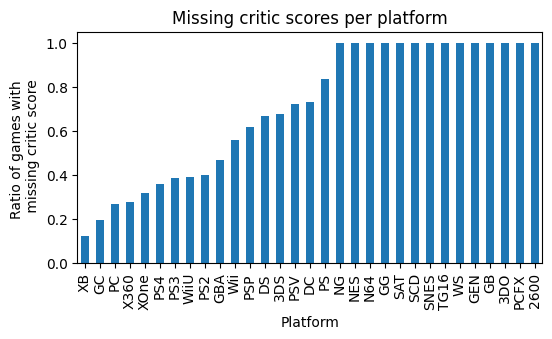

In [26]:
# Analizamos los valores ausentes respecto a las plataformas
plt.figure(figsize=(6,3))
games['critic_score'].isna().groupby(games['platform']).mean().sort_values().plot(kind='bar')
plt.title('Missing critic scores per platform')
plt.xlabel('Platform')
plt.ylabel('Ratio of games with \n missing critic score')
plt.show()


Valores ausentes en la columna 'user_score': 6699
Valores marcados como "tbd" en la columna "user_score": 2424


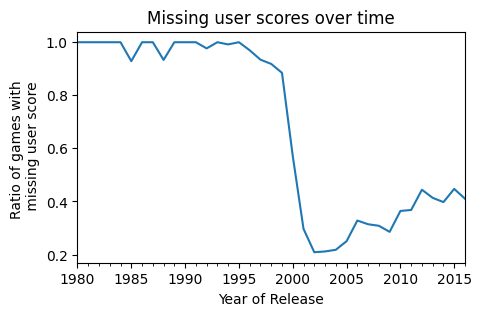

C:\Users\Laptop\AppData\Local\Temp\ipykernel_19960\175598940.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  games['user_score'].isna().groupby(games['platform']).mean().sort_values().plot(kind='bar')


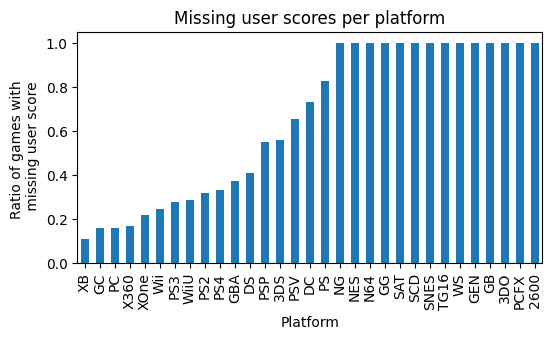

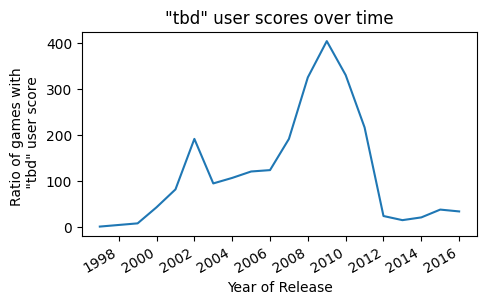

In [27]:
# Analizamos los valores ausentes en la columna 'user_score'
print("Valores ausentes en la columna 'user_score':", games['user_score'].isna().sum())
print('Valores marcados como "tbd" en la columna "user_score": 2424') # Este dato lo obtuvimos con el método describe en la sección 1 Exploración del dataset

# Analizamos valores ausentes respecto al tiempo
plt.figure(figsize=(5,3))
games['user_score'].isna().groupby(games['year_of_release']).mean().plot(kind='line')
plt.title('Missing user scores over time')
plt.xlabel('Year of Release')
plt.ylabel('Ratio of games with \n missing user score')
plt.show()

# Analizamos los valores ausentes respecto a las plataformas
plt.figure(figsize=(6,3))
games['user_score'].isna().groupby(games['platform']).mean().sort_values().plot(kind='bar')
plt.title('Missing user scores per platform')
plt.xlabel('Platform')
plt.ylabel('Ratio of games with \n missing user score')
plt.show()

#Analizamos los valores marcados como "tbd" con respecto al tiempo
tbd_user_score = games[(games['user_score']=='tbd')] # filtramos la tabla para tener solo los que tienen "tbd" y poder graficar
plt.figure(figsize=(5.1,3))
tbd_user_score.groupby('year_of_release')['user_score'].count().plot(kind='line')
plt.title('"tbd" user scores over time')
plt.xlabel('Year of Release')
plt.ylabel('Ratio of games with \n "tbd" user score')
plt.show()


In [28]:
# Analizamos los valores marcados como "tbd" con respecto a las ventas
tbd_user_score.describe(exclude=['datetime64[ns]', 'object', 'category'])


,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,2424.000000,2424.000000,2424.000000,2424.000000,1082.000000
mean,0.126052,0.043519,0.002727,0.015862,60.711645
std,0.180586,0.111412,0.026136,0.039156,11.193035
min,0.000000,0.000000,0.000000,0.000000,23.000000
25%,0.030000,0.000000,0.000000,0.000000,54.000000
50%,0.075000,0.010000,0.000000,0.010000,62.000000
75%,0.150000,0.040000,0.000000,0.020000,69.000000
max,3.450000,2.590000,0.860000,1.090000,90.000000


In [43]:
# Analizamos los juegos que podríamos considerar populares por tener ventas superiores a 1M en alguna región
pop_games_tbd_user_score = tbd_user_score.query("na_sales >= 1 or eu_sales >=1 or jp_sales >= 1 or other_sales >=1")
pop_games_tbd_user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010-01-01,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005-01-01,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011-01-01,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010-01-01,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaT,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010-01-01,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009-01-01,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004-01-01,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999-01-01,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001-01-01,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


In [55]:
# Filtramos el dataset 'games' con los resultados de la búsqueda anterior, para ver si estos juegos se 
# encuentran en otras plataformas y en esas plataformas sí cuentan con user_score.
filtered = games.query("name in @pop_games_tbd_user_score.name").sort_values(by='name')

# agrupamos por 'name' y 'platform' y mostramos la columna 'user_score' para ver si en otras plataformas sí tienen
# calificación en 'user_score'
tbd_in_other_platforms = filtered.groupby(['name','platform'])['user_score'].sum().reset_index(name='user_score')
tbd_in_other_platforms.query("user_score !=0")



C:\Users\Laptop\AppData\Local\Temp\ipykernel_19960\3484895932.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tbd_in_other_platforms = filtered.groupby(['name','platform'])['user_score'].sum().reset_index(name='user_score')


,name,platform,user_score
16,Dance Dance Revolution X2,PS2,tbd
37,Disney Princess,GBA,tbd
66,Disney Princess: Magical Jewels,DS,tbd
110,Disney Sing It: Pop Hits,PS3,tbd
119,Disney Sing It: Pop Hits,Wii,tbd
130,Frogger's Adventures: Temple of the Frog,GBA,tbd
181,Game Party 3,Wii,tbd
212,Just Dance Kids,Wii,tbd
223,Namco Museum: 50th Anniversary,GBA,tbd
224,Namco Museum: 50th Anniversary,GC,tbd


In [30]:
# Sustituimos los "tbd" por un valor de -1 y los agregamos a una nueva columna para poder utilizarlos en análisis númericos posteriores
games['fixed_user_score'] = games['user_score'].where(games['user_score'] != 'tbd', -1)
games['fixed_user_score'].tail(10)

16705    5.8
16706     -1
16707    NaN
16708    NaN
16709    NaN
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: fixed_user_score, dtype: object

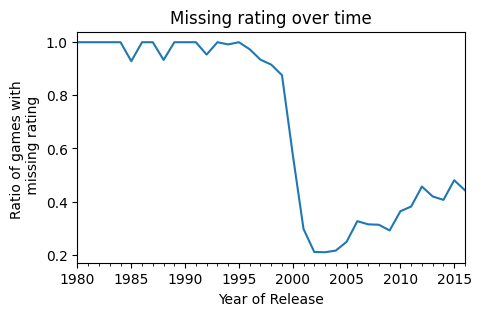

In [31]:
# Analizamos los valores ausentes para la columna 'rating'
# Analizamos valores ausentes respecto al tiempo
plt.figure(figsize=(5,3))
games['rating'].isna().groupby(games['year_of_release']).mean().plot(kind='line')
plt.title('Missing rating over time')
plt.xlabel('Year of Release')
plt.ylabel('Ratio of games with \n missing rating')
plt.show()

C:\Users\Laptop\AppData\Local\Temp\ipykernel_19960\3896449850.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  games['rating'].isna().groupby(games['genre']).mean().sort_values().plot(kind='bar')


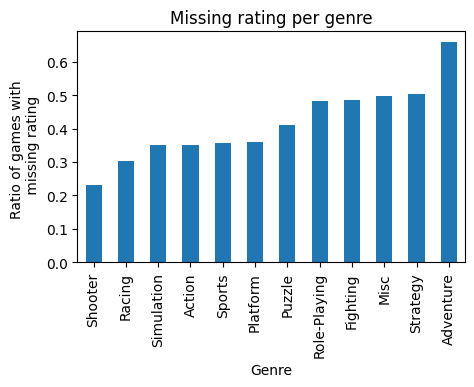

In [32]:
# Analizamos los valores ausentes respecto al género
plt.figure(figsize=(5,3))
games['rating'].isna().groupby(games['genre']).mean().sort_values().plot(kind='bar')
plt.title('Missing rating per genre')
plt.xlabel('Genre')
plt.ylabel('Ratio of games with \n missing rating')
plt.show()

C:\Users\Laptop\AppData\Local\Temp\ipykernel_19960\2118199506.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  games['rating'].isna().groupby(games['platform']).mean().sort_values().plot(kind='bar')


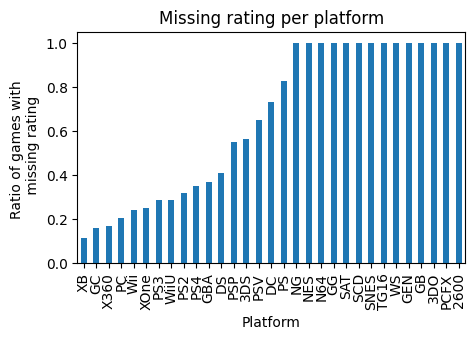

In [33]:
# Analizamos los valores ausentes respecto a la plataforma
plt.figure(figsize=(5,3))
games['rating'].isna().groupby(games['platform']).mean().sort_values().plot(kind='bar')
plt.title('Missing rating per platform')
plt.xlabel('Platform')
plt.ylabel('Ratio of games with \n missing rating')
plt.show()

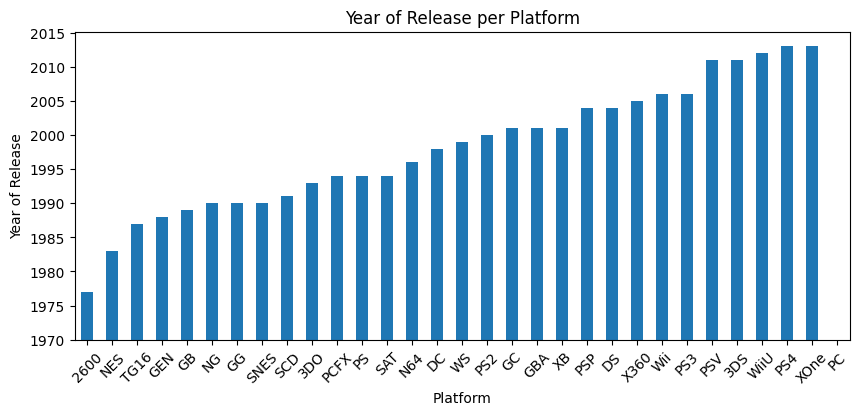

In [41]:
# Mostramos la información de la tabla 'platform_info' para ver los años de lanzamiento de las distintas plataformas de videojuegos
platform_info.sort_values(by='year_of_release').plot(
    kind='bar',
    x='platform',
    y='year_of_release',
    xlabel='Platform',
    ylabel='Year of Release',
    legend=False,
    rot=45,
    title='Year of Release per Platform',
    figsize=[10, 4]
)
plt.show()

In [56]:
# Calculamos las ventas totales de todas las regiones para cada juego
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games[['name', 'total_sales']].head()

,name,total_sales
0,Wii Sports,82.54
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.38


#### Observaciones
En esta sección nos enfocamos en analizar y en su caso corregir algunos errores de presentación, valores duplicados y valores ausentes. Encontrando lo siguiente:
1. Errores de presentación:
   1. Los nombres de las columnas no estaban en el formato preferido "snake_case" por lo que fueron cambiados a este formato.
   2. Se cambiaron los tipos de datos de la columna 'year_of_release' al tipo datetime, ya que corresponden al año de una fecha. También se cambiaron los tipos de datos de las columnas 'platform' y 'genre' a categorías ya que eso es lo que representan estas columnas y con ello podemos ahorrar un poco de espacio consumido por el dataset.
2. Valores duplicados:
   1. Se buscaron duplicados explícitos, es decir, filas completas duplicadas, pero no se encontró ninguna.
   2. Exploramos las columnas 'platform' y 'genre' sin encontrar detalles a corregir.
   3. Explorar la columma 'name' en búsqueda de duplicados implícitos es un trabajo manual que no se abordará en este proyecto. Sin embargo, al realizar algunas búsquedas puntuales sobre nombres de juegos en internet, se detectó que algunos nombres son ligeramente diferentes a los oficiales.
3. Valores ausentes:
   1. Con respecto a los valores ausentes de la columna 'name' se eliminaron dos filas completas considerando que las ventas no son significativas para el objetivo de nuestro análisis y la plataforma a la que pertenecen estos juegos también es muy antigua. Estas mismas filas tenían valores ausentes en la columna 'genre'.
   2. En la columna 'year_of_release' tenemos 269 valores ausentes. 
      1. Separamos estas filas para ver el impacto en la información de ventas si decidieramos eliminar las filas. Aunque pareciera no ser un impacto significativo viendo la media y la desviación estándar, tenemos algunos máximos que vale la pena conservar.
      2. Se analizaron también por plataforma para ver si había algún patrón, sin embargo vemos que tenemos valores ausentes tanto en plataformas más recientes como en las más antíguas.
      3. Por lo anterior, podríamos pensar que la falta de estos datos es solamente una falla en la captura de datos, ya que todos los juegos deben de tener una fecha de lanzamiento.
   3. En las columnas 'critic score', 'user_score' y 'rating', vemos una distribución de valores ausentes comparados en el tiempo muy similar. 
      1. En el caso de 'rating' sabemos que la ESRB se estableción en 1994, por lo que es de esperarse no tener esta clasificación en juegos anteriores a esa fecha. En la gráfica del tiempo podemos ver que tuvo una adopción lenta de 1994 a 1999 y después se aceleró hasta el 2002, la tendencia se mantiene hasta aproximadamente el 2005. Si bien la clasificación por la ESRB no es obligatoria, hay reportes de que en 2005 se incrementaron las multas por la falta de esta clasificación. 
      Se analizaron también con respecto a los géneros, y si bien vemos que sobresale un poco el género "Adventure", no hay una tendencia clara que indique más clasificaciones faltantes hacia un género específico.
      2. En el caso de las calificaciones 'critic_score' y 'user_score', como hemos mencionado la tendencia respecto al tiempo es muy similar a la de 'rating'. Analizando estos valores ausentes ahora por plataforma, vemos que, como lo sugiere la gráfica respecto al tiempo, las plataformas que tienen esta ausencia de datos, en su mayoría, son las que se lanzaron antes de 1994. Esto lo podemos ver realizando una búsqueda rápida en internet y condensando la información en la tabla platform_info.
      3. Respecto a los valores marcados como "tbd" de la columna 'user_score' podemos ver en la gráfica con respecto al tiempo que estos se concentran entre los años 2007 y 2011. Por lo anterior, vemos que la calificación pendiente no se debe a que el juego sea muy reciente y por ello aún no tenga una calificación. Por otro lado, podría deberse a que estos juegos no fueron lo suficientemente populares para que los usuarios los calificaran, por lo que filtramos por ventas superiores a un millón de dólares y con los encontrados hicimos un filtrado al dataset games para ver si fueron calificados en otras plataformas. Encontramos que solo 6 de 18 juegos en este filtrado, sí obtuvieron una calificación en otras plataformas. Observando también las calificaciones de los críticos, donde las hay, encontramos calificaciones bajas. Por lo tanto, podemos concluir que el valor "tbd" se atribuye a que estos juegos no fueron los suficientemente populares como para recibir una calificación de sus usuarios.
   4. Por el análisis anterior se decide dejar los valores ausentes en blanco, ya que el rellenarlos de alguna manera no hace mucho sentido y podría llevarnos a conclusiones equivocadas más adelante.
4. Por último, calculamos el valor de las ventas totales a través de las diferentes regiones y lo almacenamos en una nueva columna llamada 'total_sales'.